# MACHINE LEARNING PIPELINE FOR SOURCE 2

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, RocCurveDisplay, f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler, label_binarize, LabelEncoder
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
from xgboost.sklearn import XGBClassifier

df= pd.read_csv('Stress_Dataset.csv')

In [ ]:
# Data Cleaning and Preprocessing
df.rename(columns={"Which type of stress do you primarily experience?":"stress_type"},inplace=True)
df=df[(df["Age"]>=18) & (df["Age"]<=21)]
df.reset_index(drop=True, inplace=True)

In [ ]:
# Encode target labels
label= LabelEncoder()
df['stress_type']= label.fit_transform(df['stress_type'])
label.classes_

array(['Distress (Negative Stress) - Stress that causes anxiety and impairs well-being.',
       'Eustress (Positive Stress) - Stress that motivates and enhances performance.',
       'No Stress - Currently experiencing minimal to no stress.'],
      dtype=object)

In [ ]:
# Split the dataset
X= df.drop('stress_type', axis=1)
y= df['stress_type']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
# Evaluate the model
y_pred= model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
f1= f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.95      1.00      0.97       138
           2       1.00      0.11      0.20         9

    accuracy                           0.95       150
   macro avg       0.98      0.70      0.72       150
weighted avg       0.95      0.95      0.93       150

Accuracy: 0.9466666666666667
F1 Score: 0.9260845070422538


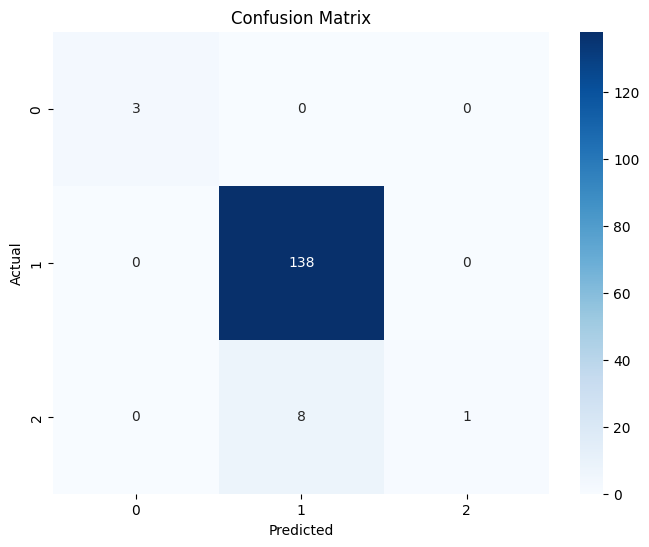

In [ ]:
# Confusion Matrix
cm= confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

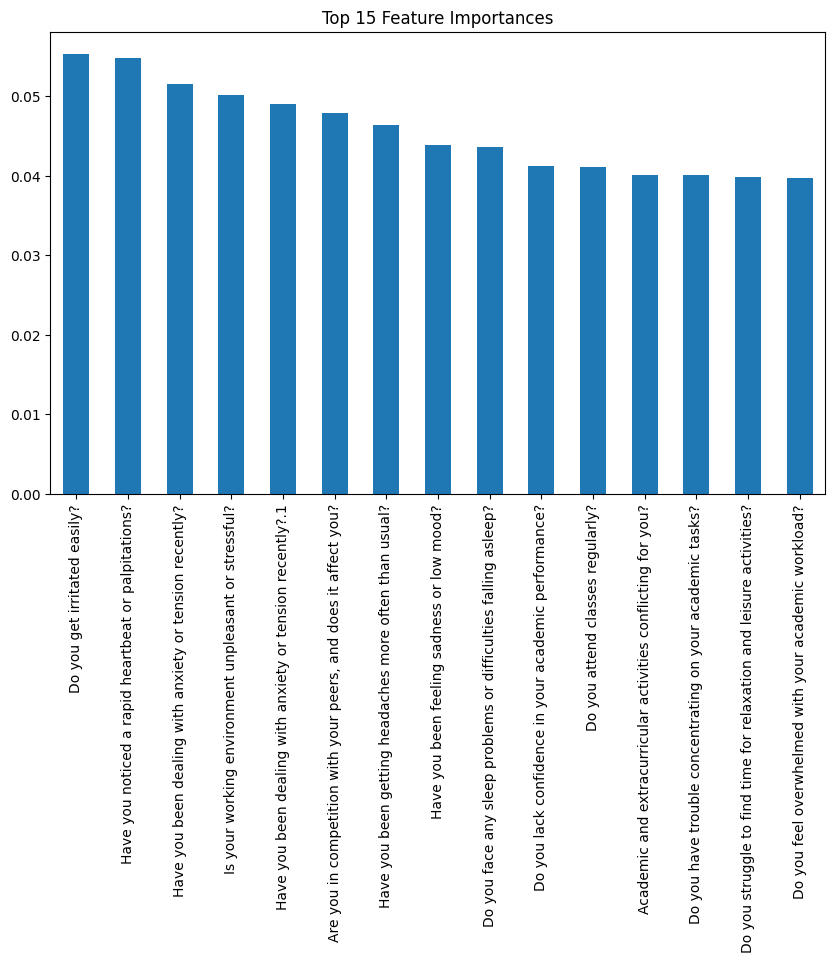

In [ ]:
# Feature Importance
feature_importances= pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).head(15).plot(kind='bar', figsize=(10,6))
plt.title('Top 15 Feature Importances')
plt.show()

In [20]:
# Cross-Validation
cv= cross_val_score(model, X, y, cv=5)
print("Cross-validation scores:", cv)
print("Mean CV score:", np.mean(cv))

Cross-validation scores: [0.94       0.94       0.93333333 0.93333333 0.94      ]
Mean CV score: 0.9373333333333335
